Homework:
Any mass can lead to a gravitational potential in 3-D (x-y-z) space$$
\nabla^2\Phi=4\pi G\rho
$$

We will set G=1 for this problem.
Please solve the potential of a line mass (i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) using SOR. Since the problem has symmetry in the Z direction:$$
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
$$

The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$ at the boundary and $\Phi_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2G$\mu$*ln(r)+constant. Where $\mu$ is its mass per unit length and r is the distance to the line mass.

----------------------------------------------------------------------------------------------------------------------------------

(I presented this homework, I had it done on time, but I didn't have it uploaded. Also wanted to make sure you knew this before I uploaded it. Thank you. )

Alright, so we have kronecker delta distribution of mass on our grid. On (x,y) = (50,50) $\Phi$ = 1 and $\Phi$ = 0 otherwise.
We are going to break this up into a grid with dx and dy spacings being equal, setting both to h.

I do want to note that these second partial derivatives will be the difference of differences, centered about some point $\Phi(x,y)$ You can think of this done symmetrically, with smallest first derivative from $\
\Phi(x,y)$

   Lefthand difference $$ \frac{\partial \Phi_L}{\partial x} = \frac{1}{\Delta x} [\Phi(x, y)- \Phi(x-\Delta x , y) ]$$
   Righthand difference $$ \frac{\partial \Phi_R}{\partial x} = \frac{1}{\Delta x} [\Phi(x+\Delta x , y) - \Phi(x, y)]$$
   Second partial derivative difference $$ \frac{\partial^2 \Phi}{\partial x ^2} = \frac{1}{\Delta x ^2} [\Phi(x+\Delta x , y) - \Phi(x, y) - (\Phi(x, y)-\Phi(x-\Delta x , y) )]$$ 
   Similarly for y. Again, we will make $\frac{1}{\Delta x ^2} = \frac{1}{\Delta y ^2} = \frac{1}{\Delta h ^2}$
   As noted above, $$ \rho = \rho (x,y) = \delta(x-x_0) \delta(y-y_0)=\delta ^{(2)}(r-r_0) $$
   Where the delta fucntion becomes a x,y Kroneckar delta as we discretize this.
   $$\rho (x,y) = \delta _{xx_0} \delta _{yy_0}$$
   Perfect, now Poisson's equation can be written in some form where each x,y has some computational implication, if we have initial conditions which we do.  
   
   Our equation is now...
   
   $$  \frac{1}{\Delta h ^2} [\Phi(x+\Delta x , y) - \Phi(x, y) - (\Phi(x, y)-\Phi(x-\Delta x , y) )] +  \frac{1}{\Delta h ^2} [\Phi(x , y+\Delta y) - \Phi(x, y) - (\Phi(x, y)-\Phi(x, y-\Delta y) )] = 4 \pi G \delta _{xx_0} \delta _{yy_0}
   $$  
   
   If you prefer, the computational form would be $$x,y \rightarrow i,j$$
   These being array indices.
   
   We now have an expression for $\Phi(x,y) $
   
We will solve this potential using SOR. To take note from our lecture 12, SOR is "The same as Gauss-Seidal, except with a $\omega$ parameter for correction" with "$\Omega$ is between 1 and 2" Analyzing that code...

 

Let me first define our constants, imports and distribution function

In [260]:
%matplotlib inline
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
dh = 1; G = 1;omega=1.2
dh2 = dh*dh
x0=90
y0=90
Nmax = 180; Niter = 3000; V = zeros((Nmax, Nmax), float); kd = zeros((Nmax, Nmax), float)

kd[x0,y0] = 1

#python index begins at 0

In [263]:
kd[x0][y0]

1.0

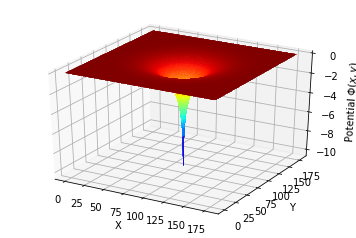

In [262]:
#Code from lecture 12 SOR:

# I will note print out the data from the iterations to keep this clean.

    
for iter in range(Niter):                                  
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j] - pi*G*dh2*kd[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
                
            # The idea that the updated value can be written as adding a term proportional to du...
            V[i,j] = V[i,j] + omega*du
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                                  
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)       
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential $\Phi(x,y) $')
p.show()                                             

Now, the dependency on $2G\mu ln(r)$+constant, with $\mu$ being mass per unit length.
Which would be our density function in this case, since any xy cross-section of our density gives us a point value, meaning that for all z we have the same point value for mass never dependent on z. This of course means that we have a line, a straight line specifically.

In [264]:
phi = zeros((Nmax, Nmax), float)
dphi = zeros((Nmax, Nmax), float)  
mu = 1
small = 0.0001
for x1 in range(0, Nmax, 1):
    for y1 in range(0, Nmax, 1):
        if (x1 == x0 and y1 ==y0):
            R = ((x1-x0 + small)**2+(y1-y0 + small)**2)**(0.5)
        else:
            R = ((x1-x0)**2+(y1-y0)**2)**(0.5)
            
        phi2 = 2*G*mu* log(R)
        phi[x1,y1] = phi2
        diff = -phi[x1,y1]+V[x1,y1] 
        dphi[x1,y1] = diff

Using small addition at any point where R = 0 in order to avoid natural logarithm of 0.

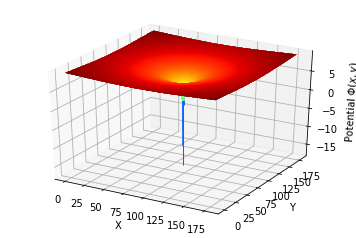

In [265]:
Z = functz(phi)                          
fig = p.figure()                                   
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)      
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential $\Phi(x,y) $')
p.show()  

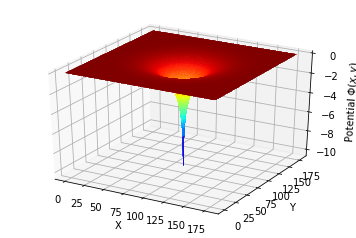

In [266]:
Z = functz(V)                          
fig = p.figure()                              
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),linewidth=0, antialiased=False, alpha=0.5)      
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential $\Phi(x,y) $')
p.show()  

Let's analyze the difference. If they follow a similar curve then the difference between the analytical form and the computed form should be close to a constant everywhere.

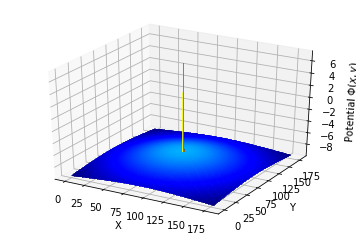

In [267]:
Z = functz(dphi)                          
fig = p.figure()                         
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)      
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential $\Phi(x,y) $')
p.show()  

Here I added a density plot in order to help distinguish how large these variations from a flat constant are. Notice how all values except the orgin mass point are the same color. This means that they are nearly all the same value.

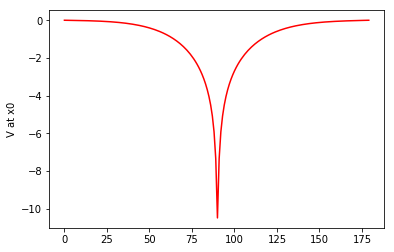

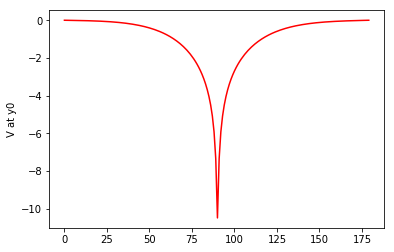

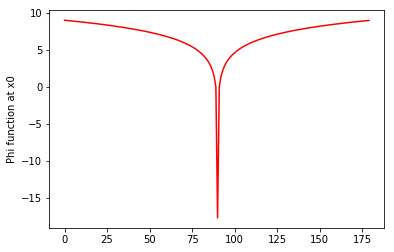

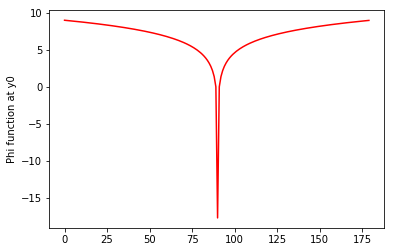

In [268]:
p.plot(V[x0,y],'-r')
p.ylabel('V at x0')
p.show()

p.plot(V[x,y0],'-r')
p.ylabel('V at y0')
p.show()

p.plot(phi[x0,y],'-r')
p.ylabel('Phi function at x0')
p.show()

p.plot(phi[x,y0],'-r')
p.ylabel('Phi function at y0')
p.show()

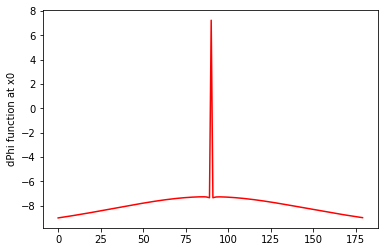

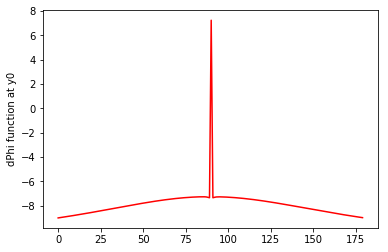

In [269]:
p.plot(dphi[x0,y],'-r')
p.ylabel('dPhi function at x0')
p.show()

p.plot(dphi[x,y0],'-r')
p.ylabel('dPhi function at y0')
p.show()

With small being set to 0.

In [270]:
phi = zeros((Nmax, Nmax), float)
dphi = zeros((Nmax, Nmax), float)  
mu = 1
small = 0.0
for x1 in range(0, Nmax, 1):
    for y1 in range(0, Nmax, 1):
        if (x1 == x0 and y1 ==y0):
            R = ((x1-x0 + small)**2+(y1-y0 + small)**2)**(0.5)
        else:
            R = ((x1-x0)**2+(y1-y0)**2)**(0.5)
            
        phi2 = 2*G*mu* log(R)
        phi[x1,y1] = phi2
        diff = -phi[x1,y1]+V[x1,y1] 
        dphi[x1,y1] = diff

C:\Users\Lazar\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


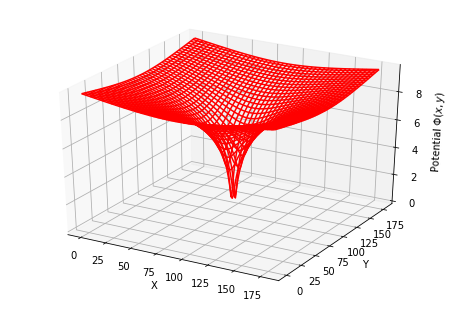

In [271]:
Z = functz(phi)                          
fig = p.figure()                                      
ax = Axes3D(fig)                                      
ax.plot_wireframe(X, Y, Z, color = 'r')               
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential $\Phi(x,y) $')
p.show()  

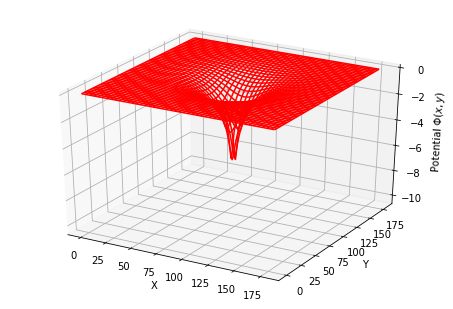

In [272]:
Z = functz(V)                          
fig = p.figure()                                    
ax = Axes3D(fig)                                    
ax.plot_wireframe(X, Y, Z, color = 'r')            
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential $\Phi(x,y) $')
p.show()  

C:\Users\Lazar\Miniconda3\lib\site-packages\matplotlib\colors.py:956: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
C:\Users\Lazar\Miniconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\Lazar\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


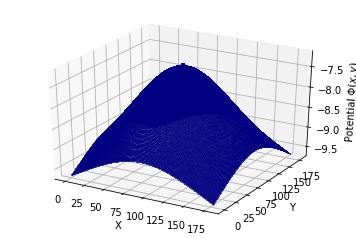

In [273]:
Z = functz(dphi)                          
fig = p.figure()                                    
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)                 
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential $\Phi(x,y) $')
p.show()  

Here, setting small to 0 and analyzing the differences causes this curve which emphasizes the differences. However, although this is clearly not a constant for x,y, the difference in value from the peak and lowest point is very small. This is why I included the color density plot. This helps picturing how large or small these differences are. Althought they are very small there is clearly some fundamental difference in shape. These are not roughly scattered equally and randomly about some constant. There are most likely higher order series terms which our calculation did not reproduce to follow the analytical function.

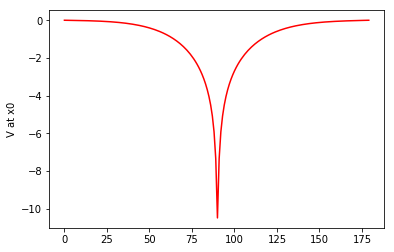

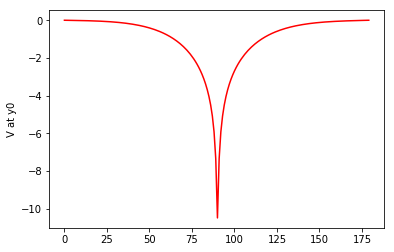

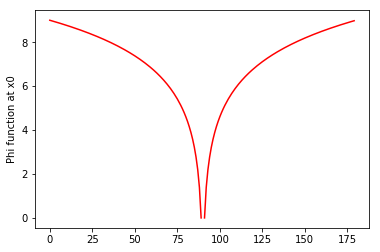

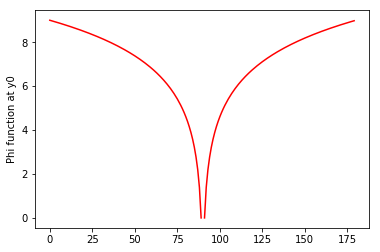

In [274]:
p.plot(V[x0,y],'-r')
p.ylabel('V at x0')
p.show()

p.plot(V[x,y0],'-r')
p.ylabel('V at y0')
p.show()

p.plot(phi[x0,y],'-r')
p.ylabel('Phi function at x0')
p.show()

p.plot(phi[x,y0],'-r')
p.ylabel('Phi function at y0')
p.show()

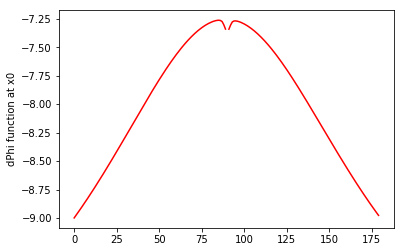

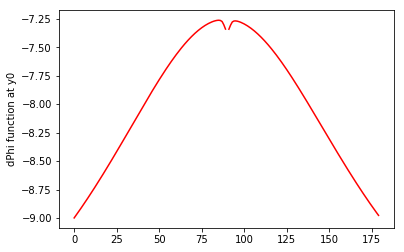

In [275]:
p.plot(dphi[x0,y],'-r')
p.ylabel('dPhi function at x0')
p.show()

p.plot(dphi[x,y0],'-r')
p.ylabel('dPhi function at y0')
p.show()

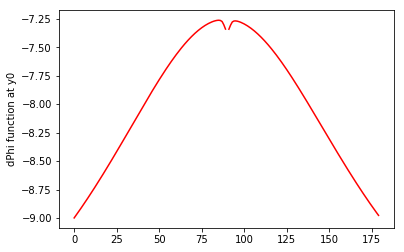

In [276]:
p.plot(dphi[x,y0],'-r')
p.ylabel('dPhi function at y0')
p.show()

In [277]:
Rf = zeros((Nmax, Nmax), float)
mu = 1
small = 0.0001
for x1 in range(0, Nmax, 1):
    for y1 in range(x1, Nmax, 1):
        if (x1 == x0 and y1 ==y0):
            R = ((x1-x0 + small)**2+(y1-y0 + small)**2)**(0.5)

        else:
            R = ((x1-x0)**2+(y1-y0)**2)**(0.5)
            
        Rf[x1] = R 
        

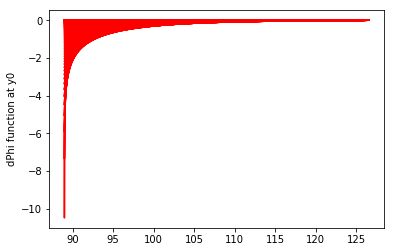

In [278]:
phidiff2 = V - phi
p.plot(Rf,V, '-r')
p.ylabel('dPhi function at y0')
p.show()



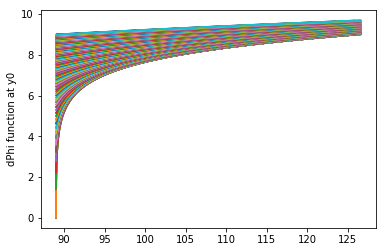

In [279]:
p.plot(Rf,phi)
p.ylabel('dPhi function at y0')
p.show()


In [256]:
V3 = zeros((Nmax), float)
Rf = zeros((Nmax, Nmax), float)
mu = 1
small = 0.0001
for y1 in range(0, Nmax, 1):
    x1 = x0
    if (y1 ==y0):
        R = ((x1-x0 + small)**2 + (y1-y0 + small)**2)**(0.5)

    else:
        R = ((x1-x0)**2+(y1-y0)**2)**(0.5)
            
    Rf[y1] = R 
    V3[y1] = V[x0,y1] 
        #print(V[x1][y1])
            
        

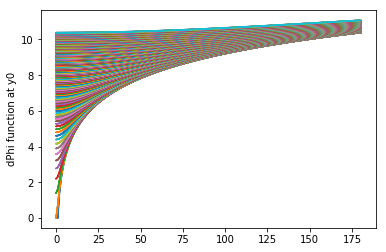

In [257]:
#p.plot(V1[x1],'-r')
p.plot(Rf,phi)
p.ylabel('dPhi function at y0')
p.show()


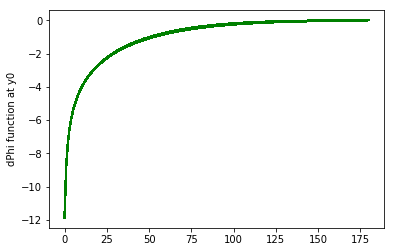

In [258]:
p.plot(Rf,V3, '-g')
p.ylabel('dPhi function at y0')
p.show()


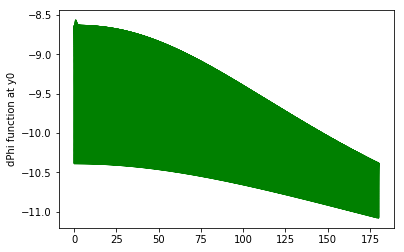

In [259]:
p.plot(Rf,phidiff2, '-g')
p.ylabel('dPhi function at y0')
p.show()
